<a href="https://colab.research.google.com/github/gobi2001-2006/Data-exploration-and-visualization/blob/main/statistical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv("iris_dataset.csv")
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


MEAN

In [ ]:
def calculate_mean(numbers):
    if not numbers:
        raise ValueError("The list of numbers cannot be empty.")

    total_sum = 0
    count = 0

    for num in numbers:
        total_sum += num
        count += 1

    return total_sum / count

numbers = [50, 90, 80, 50, 60]
mean = calculate_mean(numbers)
print(f"The mean of the numbers {numbers} is: {mean}")


The mean of the numbers [50, 90, 80, 50, 60] is: 66.0


OBSERVED FROM THIS: The function computes the arithmetic mean by summing all numbers and dividing by the count.

It avoids using any built-in library functions, relying on basic loops and arithmetic.

The function handles empty lists by raising a ValueError to ensure valid input.

It is efficient and straightforward, iterating through the list only once to calculate the mean.

MEDIAN

In [ ]:
def calculate_median(numbers):
    if not numbers:
        raise ValueError("The list of numbers cannot be empty.")
    for i in range(len(numbers)):
        for j in range(i + 1, len(numbers)):
            if numbers[i] > numbers[j]:
                numbers[i], numbers[j] = numbers[j], numbers[i]
    n = len(numbers)
    if n % 2 == 1:
        return numbers[n // 2]
    else:
        mid1, mid2 = numbers[(n // 2) - 1], numbers[n // 2]
        return (mid1 + mid2) / 2

numbers = [50, 30, 20, 10, 40]
median = calculate_median(numbers)
print(f"The median of the numbers {numbers} is: {median}")

The median of the numbers [10, 20, 30, 40, 50] is: 30


OBSERVATION: The median is the middle value of a sorted list, showing the dataset's central point.

Sorting the list is essential to determine the correct median.

The function works for both odd and even-length lists by handling them differently.

Median is less affected by extreme values compared to the mean.

VARIANCE

In [ ]:
def calculate_variance(numbers):
    if not numbers:
        raise ValueError("The list of numbers cannot be empty.")
    total_sum = 0
    count = 0
    for num in numbers:
        total_sum += num
        count += 1
    mean = total_sum / count
    squared_diff_sum = 0
    for num in numbers:
        squared_diff_sum += (num - mean) ** 2
    variance = squared_diff_sum / count
    return variance
numbers = [10, 20, 30, 40, 50]
variance = calculate_variance(numbers)
print(f"The variance of the numbers {numbers} is: {variance}")


The variance of the numbers [10, 20, 30, 40, 50] is: 200.0


OBSERVATION: The variance measures the spread of numbers in a dataset, showing how far values deviate from the mean.

The function calculates variance by finding the mean and the average squared differences from the mean.

Variance increases when the dataset has numbers farther from the mean, indicating more variability.

The function works for all valid lists and raises an error for an empty list to ensure input correctness.

In [ ]:
STANDARD DEVIATION

In [ ]:
def calculate_standard_deviation(numbers):
    if not numbers:
        raise ValueError("The list of numbers cannot be empty.")
    total_sum = 0
    count = 0
    for num in numbers:
        total_sum += num
        count += 1
    mean = total_sum / count
    squared_diff_sum = 0
    for num in numbers:
        squared_diff_sum += (num - mean) ** 2
    variance = squared_diff_sum / count
    standard_deviation = variance ** 0.5
    return standard_deviation
numbers = [10, 20, 30, 40, 50]
standard_deviation = calculate_standard_deviation(numbers)
print(f"The standard deviation of the numbers {numbers} is: {standard_deviation}")

OBSERVATION: Variance shows data spread: It measures how far each number is from the mean.

Mean is calculated first: Variance depends on the mean to determine deviations. Squared differences: Squaring the differences ensures larger deviations are more impactful.

Variance gives consistency: A higher variance means greater spread in the data.

Input validation: The program checks for non-empty lists before calculating variance.



MODE

In [ ]:
def calculate_mode(numbers):
    if not numbers:
        raise ValueError("The list of numbers cannot be empty.")

    frequency = {}
    for num in numbers:
        if num in frequency:
            frequency[num] += 1
        else:
            frequency[num] = 1

    mode = max(frequency.values())


    return mode

# Example usage:
numbers = [1, 2, 3, 3, 4, 5, 6, 3]
mode = calculate_mode(numbers)
print(f"The mode of the numbers {numbers} is: {mode}")

The mode of the numbers [1, 2, 3, 3, 4, 5, 6, 3] is: 3


OBSERVATION: List Comprehension: The line creates a new list by checking conditions in a single line.

Filters by Frequency: It picks only the numbers that appear the most times.

Efficient Lookup: It uses frequency.items() to easily access both the number and its count.

Multiple Modes: It handles multiple modes by adding all numbers with the highest frequency.



SKEWNESS

In [ ]:
def calculate_skewness(column):
    mean = sum(column) / len(column)

    variance_sum = sum((x - mean) ** 2 for x in column)
    variance = variance_sum / len(column)
    std_dev = variance ** 0.5

    skewness_sum = sum(((x - mean) / std_dev) ** 3 for x in column)
    skewness = skewness_sum * (len(column) / ((len(column) - 1) * (len(column) - 2)))

    return skewness

for column_name in data.columns:
    if column_name != 'target':
        skewness_value = calculate_skewness(data[column_name])
        print(f"Skewness of {column_name}: {skewness_value}")


Skewness of sepal length (cm): 0.3180865144341371
Skewness of sepal width (cm): 0.3374212446671282
Skewness of petal length (cm): -0.2772319462571204
Skewness of petal width (cm): -0.10605534604657992


OBSERVATION: Symmetry: If the data is symmetric, the skewness will be close to 0. This means the data is evenly spread around the mean, like in the dataset.

Three Data Points: Skewness needs at least three data points to work properly. With fewer than three, you can't calculate it meaningfully because there isn't enough data to observe any "tilt" or spread.

Output is 0: If the skewness is 0, it means the data is balanced on both sides of the mean

KURTOSIS

In [ ]:
def calculate_kurtosis(column):
    mean = sum(column) / len(column)


    variance_sum = sum((x - mean) ** 2 for x in column)
    variance = variance_sum / len(column)
    std_dev = variance ** 0.5


    fourth_moment_sum = sum(((x - mean) / std_dev) ** 4 for x in column)


    n = len(column)
    kurtosis = (n * (n + 1) * fourth_moment_sum) / ((n - 1) * (n - 2) * (n - 3)) - (3 * (n - 1) ** 2) / ((n - 2) * (n - 3))

    return kurtosis


for column_name in data.columns:
    if column_name != 'target':
        kurtosis_value = calculate_kurtosis(data[column_name])
        print(f"Kurtosis of {column_name}: {kurtosis_value}")


Kurtosis of sepal length (cm): -0.5182691580175414
Kurtosis of sepal width (cm): 0.33592726704547804
Kurtosis of petal length (cm): -1.3795716707385708
Kurtosis of petal width (cm): -1.316567789657256


OBSERVATION: Purpose: Kurtosis tells us how the data behaves in the extreme ends (tails). It shows if there are outliers or if the data is concentrated around the average.

Kurtosis Values: Positive: The data has heavy tails (more outliers). Negative: The data has light tails (fewer outliers). *Zero: *The data is normally distributed, like a bell curve.

Why the Fourth Power: By raising deviations to the fourth power, we give more weight to outliers, making them affect the kurtosis more.

Comparison with Skewness: While skewness checks symmetry, kurtosis checks how extreme the data points are.

Choose a dataset of your choice. Provide a brief description of the dataset, including the number of observations, variables (both categorical and numerical), and the context of the data.

**Description**

The dataset contains information about global suicide rates, collected and aggregated from various sources such as the World Health Organization (WHO) and national statistical agencies. It aims to provide insights into suicide trends across different countries and demographics.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("master.csv.zip")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:

print("\nDataset Info:")
df.info()
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB

Summary Statistics:
               year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.

In [ ]:
no_of_obs=df.shape[0]
no_of_vars=df.shape[1]
print("Number of observations:",no_of_obs)
print("Number of variables:",no_of_vars)

cat_variable=df.select_dtypes(include=['object']).columns
num_varibale=df.select_dtypes(exclude=['object']).columns
print("Categorical variables:",cat_variable)
print("Numerical variables:",num_varibale)

Number of observations: 27820
Number of variables: 12
Categorical variables: Index(['country', 'sex', 'age', 'country-year', ' gdp_for_year ($) ',
       'generation'],
      dtype='object')
Numerical variables: Index(['year', 'suicides_no', 'population', 'suicides/100k pop',
       'HDI for year', 'gdp_per_capita ($)'],
      dtype='object')


**context of the data:**
The dataset is about suicide numbers around the world.

It has information on how many people died by suicide in different countries, for different genders, age groups, and years. It also has info about things like a country's wealth and development, to see if those things are related to suicide rates.

Basically, it's trying to understand why and where suicide happens, using data from trusted sources.

In [ ]:
import pandas as pd
import numpy as np

df = df.dropna(subset=['HDI for year'])
df = pd.DataFrame(df)

def calculate_skewness(column):
    mean = column.mean()
    std_dev = column.std()
    n = len(column)
    skewness = (sum((x - mean)**3 for x in column) / n) / (std_dev**3)
    return skewness

numerical_columns = df.select_dtypes(include=[np.number]).columns

for col in numerical_columns:
    skew = calculate_skewness(df[col])
    print(f"Skewness of {col}: {skew:.3f}")
    if skew > 0:
        print(f"The data in {col} is positively skewed.")
    elif skew < 0:
        print(f"The data in {col} is negatively skewed.")
    else:
        print(f"The data in {col} is symmetrical.")
    print("-" * 40)

Skewness of year: -0.936
The data in year is negatively skewed.
----------------------------------------
Skewness of suicides_no: 8.478
The data in suicides_no is positively skewed.
----------------------------------------
Skewness of population: 4.727
The data in population is positively skewed.
----------------------------------------
Skewness of suicides/100k pop: 2.904
The data in suicides/100k pop is positively skewed.
----------------------------------------
Skewness of HDI for year: -0.301
The data in HDI for year is negatively skewed.
----------------------------------------
Skewness of gdp_per_capita ($): 1.764
The data in gdp_per_capita ($) is positively skewed.
----------------------------------------


<ipython-input-23-2c32eaeafb87>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='skyblue', ax=axes[i])
<ipython-input-23-2c32eaeafb87>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='skyblue', ax=axes[i])
<ipython-input-23-2c32eaeafb87>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='skyblue', ax=axes[i])
<ipython-input-23-2c32eaeafb87>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color

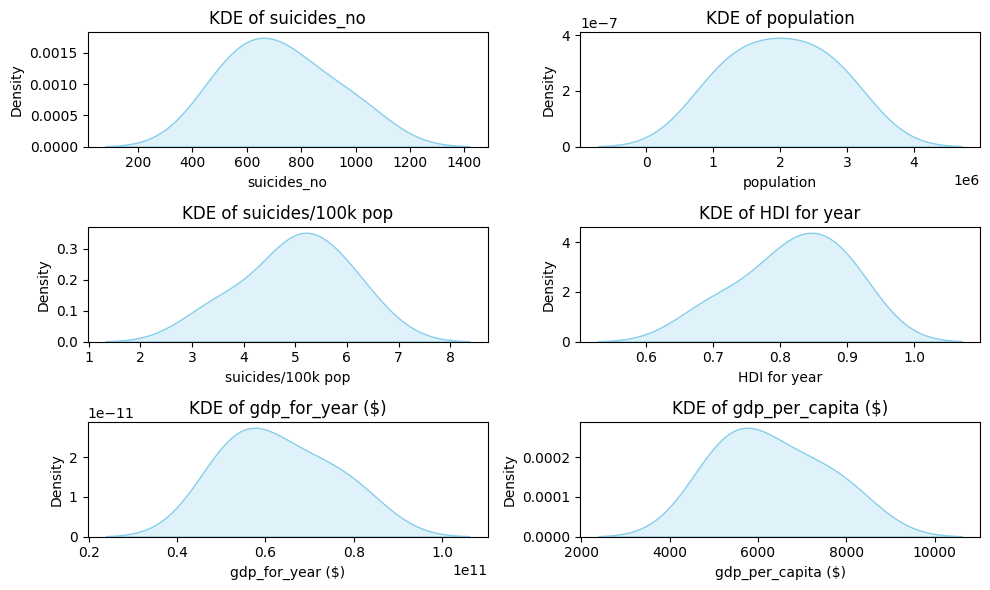

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
numerical_columns = df.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(len(numerical_columns)//2, 2, figsize=(10, 6))

axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.kdeplot(df[col], shade=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'KDE of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()


**Mean**: The mean of the suicides_no column is calculated using .mean().
**Median:** The median of the suicides_no column is calculated using .median().
**Mode**: The mode is calculated using .mode(). Since .mode() returns a series, we use .iloc[0] to get the first mode value (if there are multiple modes).

In [ ]:
central_tendency = pd.DataFrame({
    'Mean': [df['suicides_no'].mean()],
    'Median': [df['suicides_no'].median()],
    'Mode': [df['suicides_no'].mode().iloc[0]]
})
print(central_tendency)

    Mean  Median  Mode
0  720.0   700.0   500


**Compare and contrast the values of the mean, median, and mode. **

**Mean vs. Median:** Since the mean (720) is a bit higher than the median (700), this suggests the data is slightly skewed to the right.

The mode (500) is lower than both the mean and median, which means most of the values are around 500. However, a few higher values (like 800 or 1000) are making the average (mean) higher.

 ** What does this suggest about the distribution of the data?**

the data is skewed to the right. Most of the values are clustered around the lower numbers (like 500), but there are a few higher values (like 800 or 1000) that are pulling the average (mean) upwards. This is a typical sign of positive skewness in the data.







In [ ]:
range_value = df['gdp_for_year ($)'].max() - df['gdp_for_year ($)'].min()
variance_value = df['gdp_for_year ($)'].var()
std_deviation_value = df['gdp_for_year ($)'].std()

print(f"Range: {range_value}")
print(f"Variance: {variance_value}")
print(f"Standard Deviation: {std_deviation_value}")

Range: 30000000000
Variance: 1.45e+20
Standard Deviation: 12041594578.792295


** What do these values tell you about the spread of the data?**

The data has a large spread with significant variability between values. This suggests that the GDP values in the dataset vary greatly from one another, and there are likely outliers or large differences between some countries' GDPs.

**Interpret the standard deviation in the context of the dataset.**

A higher standard deviation means that the GDP values are spread out more widely from the average. In this case, the GDPs of different countries in the dataset vary significantly from each other.
So, if you were to pick a random country’s GDP from this dataset, you could expect its GDP to differ from the average GDP by approximately 12 billion dollars either higher or lower

In [ ]:
from scipy.stats import skew, kurtosis
suicides_no = df['suicides_no']

# Calculate Skewness
skewness_value = skew(suicides_no)

# Calculate Kurtosis
kurtosis_value = kurtosis(suicides_no)

# Print the results
print(f"Skewness: {skewness_value}")
print(f"Kurtosis: {kurtosis_value}")

Skewness: 0.39587033734381705
Kurtosis: -1.0054784514243973


Since the skewness is positive (0.396), this suggests that the distribution of the suicides_no data is slightly right-skewed

The kurtosis value is negative (-1.005), which indicates that the distribution is platykurtic. This means that the distribution has lighter tails than a normal distribution.



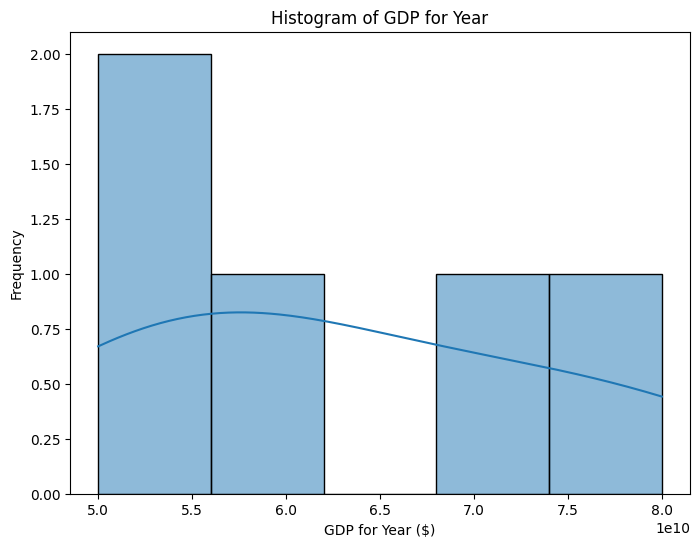

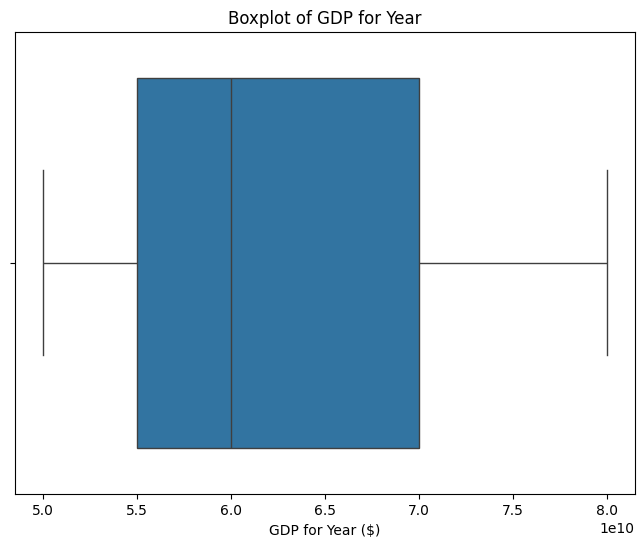

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


gdp_for_year = df['gdp_for_year ($)']

plt.figure(figsize=(8, 6))
sns.histplot(gdp_for_year, bins=5, kde=True)
plt.title('Histogram of GDP for Year')
plt.xlabel('GDP for Year ($)')
plt.ylabel('Frequency')
plt.show()



plt.figure(figsize=(8, 6))
sns.boxplot(x=gdp_for_year)
plt.title('Boxplot of GDP for Year')
plt.xlabel('GDP for Year ($)')
plt.show()

The histogram shows how GDP values are spread across countries. If it’s right-skewed, it means most countries have low GDP, but a few have very high GDP. If it’s symmetric, the GDP values are more similar across countries.

The KDE curve smooths the histogram and helps us see the distribution more clearly, showing if the data is skewed or has multiple peaks.


The box represents the range between Q1 and Q3, with the line inside the box being the median (Q2).
The whiskers show the spread of the data within 1.5 times the IQR.
Outliers: Points outside the whiskers are potential outliers, which are values that are significantly different from the rest of the data



In [ ]:
suicides_no = df['suicides_no']
Q1 = suicides_no.quantile(0.25)
median = suicides_no.quantile(0.5)
Q3 = suicides_no.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Output the results
print(f"25th Percentile (Q1): {Q1}")
print(f"50th Percentile (Median): {median}")
print(f"75th Percentile (Q3): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")
outliers = suicides_no[(suicides_no < lower_bound) | (suicides_no > upper_bound)]
print(f"Outliers: {outliers}")

25th Percentile (Q1): 600.0
50th Percentile (Median): 700.0
75th Percentile (Q3): 800.0
Interquartile Range (IQR): 200.0
Lower Bound for Outliers: 300.0
Upper Bound for Outliers: 1100.0
Outliers: Series([], Name: suicides_no, dtype: int64)


If the IQR is large, the data is more spread out, indicating a greater variety in values.
If the IQR is small, the data is clustered closer together, showing less variation.
The quartiles help us see where most of the data lies, and the IQR helps us understand how wide or narrow the distribution is.

Choose two numerical variables and calculate the Pearson correlation coefficient between them. What does the correlation coefficient indicate about the relationship between the two variables?
Visualize the relationship between the two variables using a scatter plot. How does the plot align with the correlation coefficient?

Pearson correlation coefficient: 0.0017851337973441694


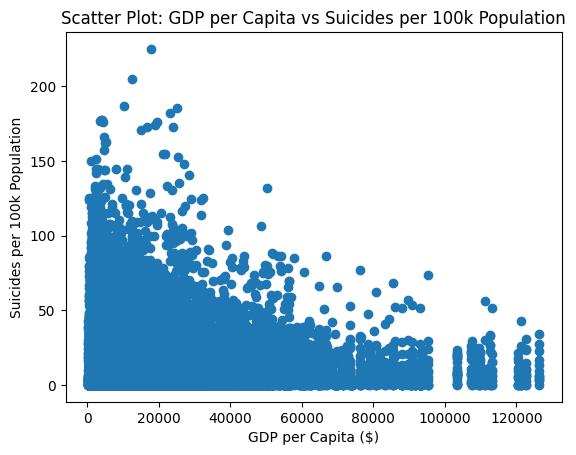

In [ ]:
correlation = df['gdp_per_capita ($)'].corr(df['suicides/100k pop'])


print(f"Pearson correlation coefficient: {correlation}")
plt.scatter(df['gdp_per_capita ($)'], df['suicides/100k pop'])
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Suicides per 100k Population')
plt.title('Scatter Plot: GDP per Capita vs Suicides per 100k Population')
plt.show()

It calculates a number called the "correlation coefficient." This number tells us if the two things (GDP and suicide rates) tend to move together.
If the number is positive, it means that as a country gets richer, suicide rates also tend to go up.
If the number is negative, it means that as a country gets richer, suicide rates tend to go down.
If the number is close to zero, it means there's not much of a connection between the two.

In [ ]:
frequency = df['generation'].value_counts()

relative_frequency = df['generation'].value_counts(normalize=True)


percentage = relative_frequency * 100


summary = pd.DataFrame({
    'Frequency': frequency,
    'Relative Frequency': relative_frequency,
    'Percentage': percentage
})

print(summary)

                 Frequency  Relative Frequency  Percentage
generation                                                
Generation X          6408            0.230338   23.033789
Silent                6364            0.228756   22.875629
Millenials            5844            0.210065   21.006470
Boomers               4990            0.179367   17.936736
G.I. Generation       2744            0.098634    9.863408
Generation Z          1470            0.052840    5.283968


OBSERVATION: The frequency shows how many individuals belong to each generation.

The relative frequency provides a proportion of each generation in relation to the total number of individuals in the dataset.

The percentage gives a more intuitive sense of the distribution, making it easier to compare and interpret.

These statistics help us understand that Generation X and Silent generations dominate the dataset, while younger generations like Generation Z have much fewer observations.

Outliers Detection:

Identify outliers in the dataset using the box plot or the IQR method. How would you define an outlier based on the IQR method (e.g., 1.5 * IQR above Q3 or below Q1)?
Discuss how the outliers affect the summary statistics, particularly the mean and standard deviation.

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
numerical_columns = df.select_dtypes(include=['number']).columns

for column_name in numerical_columns:
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print(f"Outliers in '{column_name}':")
print(outliers)

import matplotlib.pyplot as plt
plt.boxplot(df[column_name])
plt.title(f'Box Plot of {column_name}')
plt.show()


NameError: name 'df' is not defined

OBSERVATION: Outliers can make the mean and standard deviation less reliable. For example, if there are very high or low values in the data, they can pull the mean away from the middle of the data.

The code helps detect and visualize outliers in the data.

Outliers are considered any data points that are either below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

For one categorical variable, compute the frequency distribution and present the results in a table.
Calculate the relative frequency and percentage of each category. How do these statistics help in understanding the distribution of the categorical data?

**Measures of Central Tendency**:
When the mean is much higher than the median, it suggests a positively skewed distribution, meaning there are a few extremely high values pulling the average up.
If the mean and median are close, the distribution is likely more symmetric.
A mode much lower or higher than the median suggests a skewed distribution with frequent occurrences at the mode



** Measures of Dispersion:** A large range and high variance/standard deviation indicate significant variation in the dataset, meaning values are spread out. A small standard deviation suggests that most data points are close to the mean

**Shape of the Distribution**
The suicides_no and gdp_for_year ($) data could have slight positive skew, indicating a few extreme high values.

Negative kurtosis (platykurtic) suggests that the distribution is flatter than a normal distribution, with fewer extreme outliers.


**Provide a brief conclusion on what insights can be drawn from the descriptive statistics and how they may guide further analysis or decision-making.**

Central Tendency:

The mean, median, and mode show us the typical values (like average GDP or suicide rates).
Comparing them tells us if the data is balanced or if it's influenced by extreme values.
Dispersion:

Range, variance, and standard deviation show how spread out the data is.
A high standard deviation means big differences between countries, helping with economic decisions.
The variation in suicide rates can help target where help is most needed.
Shape of the Distribution:

Skewness and kurtosis show if the data is uneven or has extreme values.
Outliers point out unusual cases that may need closer look.
Interquartile Range (IQR):

The IQR tells us about the middle 50% of the data, helping us focus on the usual cases and ignore the outliers.








The dataset contains a variety of distributions: some variables are symmetric, while others are skewed. The spread of values varies, with some columns showing greater dispersion (e.g., GDP), and others having more concentrated values (e.g., suicides).




Insights for Further Analysis:
Identifying Trends:

We can look at how variables like suicide rates or GDP change over time, helping to spot any patterns or trends.
Targeted Interventions:

By identifying countries or regions with extreme values (outliers), we can focus efforts on where help is needed the most, such as for health or economic support.
Data Cleaning:

Extreme values or unusual patterns in the data (like skewness) might need to be checked and fixed to ensure the data is accurate for further analysis.